**Load Data Model and Libraries**

# Titanic tutorial(Kaggle)

Hello everyone!!!
I predicted survivors of Titanic. follow the link (https://www.kaggle.com/c/titanic)


In [86]:
#first import variety tools(pandas, numpy,matplotilib,seaborn)

import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sys
from sklearn import preprocessing


# Load Data

In [87]:
data_train=pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
# I prefer to combine because more easy edit features for later
data = data_train.append(data_test)
data.head()# check sample of data list(type pandas)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


The train data and test data involve informations that are Age,Embarked,Fare,Name,Parch(Parents + Child),Passengerld,Pclass,
Sex, SibSp(Siblings + Spouse),Survived and Ticket number

In [88]:
data.describe()#This commend show total,mean,standard deviation,minimum and maxmum

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


# Data check(null,type and etc..)
We need to fiil or remove missing data!!!! so first find which is missing!!!

In [89]:
data.info()# show information of type and etc..

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [90]:
data.isnull().any()# check which have missing data 

Age             True
Cabin           True
Embarked        True
Fare            True
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
dtype: bool

In [91]:
print('Train coloumns with null values:\n',data.isnull().sum())
print('-'*40)
print('Test coloumns with null values:\n',data_test.isnull().sum())

Train coloumns with null values:
 Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64
----------------------------------------
Test coloumns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Data cleaning & Engineering
We catch featuers which have missing!! Age,Cabin,Embarked,Fare,Survived
So we consider how to solve missing data. fill or remove 

In [92]:
"""
PassengerId = data_test['PassengerId']
data = data.drop(['PassengerId'],axis =1)
data_train.head()
"""

"\nPassengerId = data_test['PassengerId']\ndata = data.drop(['PassengerId'],axis =1)\ndata_train.head()\n"

In [93]:
data_train.loc[data_train['Cabin'].notnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [94]:
data['Cabin_type'] = 0
for i in data:
    data['Cabin_type']=data.Cabin.str.extract('([A-Z])')


In [95]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Cabin_type
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,NaN
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,NaN
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,NaN


In [96]:
data['Cabin_type'] = data['Cabin_type'].fillna('X')

In [97]:
pd.crosstab(data.Cabin_type,data.Survived).style.background_gradient(cmap='summer_r')

Survived,0.0,1.0
Cabin_type,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0
X,481,206


In [98]:
data['Cabin_type'].replace(['A','B','C','D','E','F','G','T','X'],[1,2,3,4,5,6,7,8,0],inplace = True)

In [99]:
print('Train coloumns with null values:\n',data.isnull().sum())
print('-'*40)
print('Test coloumns with null values:\n',data_test.isnull().sum())

Train coloumns with null values:
 Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Cabin_type        0
dtype: int64
----------------------------------------
Test coloumns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


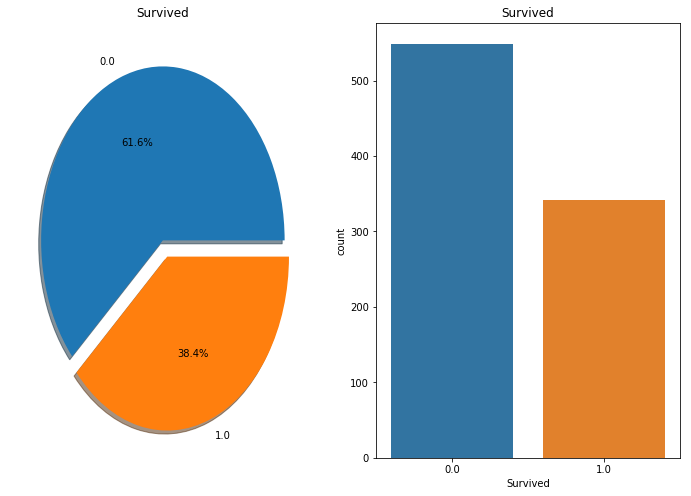

In [100]:
f,ax=plt.subplots(1,2,figsize=(12,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# Sex with Survived

In [101]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Cabin_type
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,3
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,3
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0


In [102]:
print(data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean())
print(data[['Sex','Survived']].groupby(['Sex'],as_index=False).count())
print(data.groupby(['Sex','Survived'])['Survived'].count())

      Sex  Survived
0  female  0.742038
1    male  0.188908
      Sex  Survived
0  female       314
1    male       577
Sex     Survived
female  0.0          81
        1.0         233
male    0.0         468
        1.0         109
Name: Survived, dtype: int64


In [103]:
pd.crosstab(data.Sex,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0.0,1.0,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


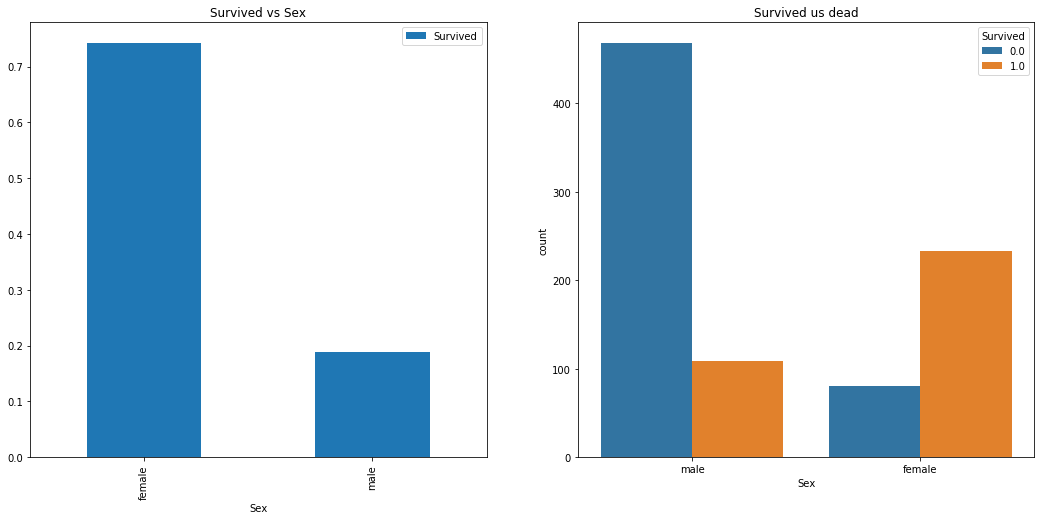

In [104]:
f,ax =plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived us dead')
plt.show()

# Pclass with Survived

In [105]:
print(data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean())
print(data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).count())
print(data.groupby(['Pclass','Survived'])['Survived'].count())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   Pclass  Survived
0       1       216
1       2       184
2       3       491
Pclass  Survived
1       0.0          80
        1.0         136
2       0.0          97
        1.0          87
3       0.0         372
        1.0         119
Name: Survived, dtype: int64


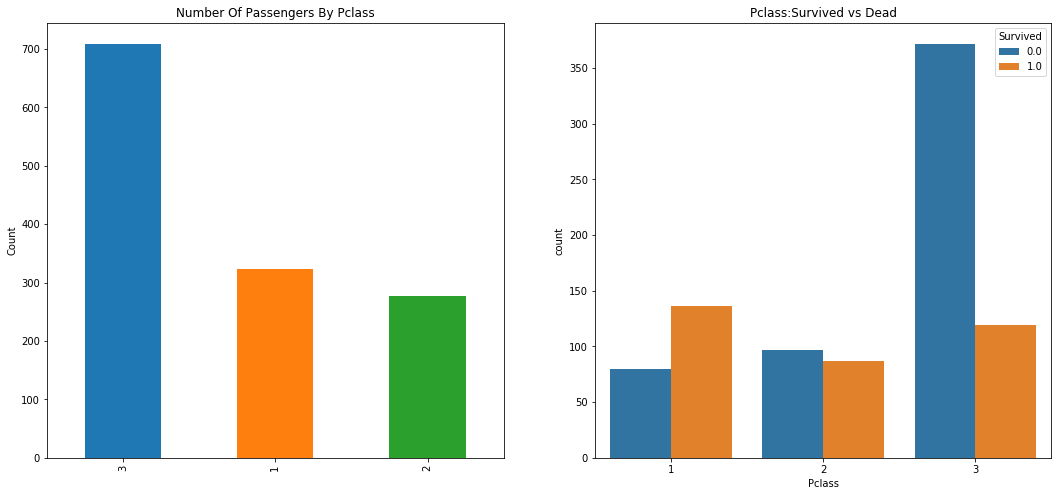

In [106]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [107]:
pd.crosstab([data.Survived,data.Sex],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

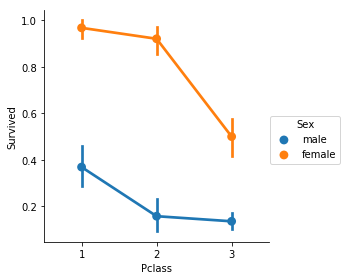

In [108]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

# Per fare 

In [109]:
data.head(20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Cabin_type
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,3
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,3
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,5
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,0


# Age--> Continous Feature

I have seperated Age by two way that 'Initial'and 'statistics'
I tried  combine 'Initial' and 'statistics'

# First way(Statistics)

In [110]:
"""
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Yougest Passenger was of:',data['Age'].min(),'Years')
print('Average Passenger was of :',data['Age'].mean(),'Years')
"""

"\nprint('Oldest Passenger was of:',data['Age'].max(),'Years')\nprint('Yougest Passenger was of:',data['Age'].min(),'Years')\nprint('Average Passenger was of :',data['Age'].mean(),'Years')\n"

In [111]:
"""
age_max = data['Age'].max()
age_min = data['Age'].min()
age_std = data['Age'].std()
age_avg = data['Age'].mean()
age_null_count = data['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
data['Age'][np.isnan(data['Age'])] = age_null_random_list
data['Age'] = data['Age'].astype(int)
print(data['Age'].isnull().sum())
data['CategoricalAge'] = pd.cut(data['Age'], 5)
"""

"\nage_max = data['Age'].max()\nage_min = data['Age'].min()\nage_std = data['Age'].std()\nage_avg = data['Age'].mean()\nage_null_count = data['Age'].isnull().sum()\nage_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)\ndata['Age'][np.isnan(data['Age'])] = age_null_random_list\ndata['Age'] = data['Age'].astype(int)\nprint(data['Age'].isnull().sum())\ndata['CategoricalAge'] = pd.cut(data['Age'], 5)\n"

In [112]:
"""
f,ax =plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue = "Survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survied')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()
"""

'\nf,ax =plt.subplots(1,2,figsize=(18,8))\nsns.violinplot("Pclass","Age", hue = "Survived",data=data,split=True,ax=ax[0])\nax[0].set_title(\'Pclass and Age vs Survied\')\nax[0].set_yticks(range(0,110,10))\nsns.violinplot("Sex","Age",hue="Survived",data=data,split=True,ax=ax[1])\nax[1].set_title(\'Sex and Age vs Survived\')\nax[1].set_yticks(range(0,110,10))\nplt.show()\n'

In [113]:
"""
f,ax =plt.subplots(1,2,figsize=(18,8))
sns.factorplot('Pclass','Survived',hue='CategoricalAge',data=data,ax=ax[0])
sns.factorplot('Sex','Survived',hue='CategoricalAge',data=data,ax=ax[1])
plt.close(2)
plt.show()
"""

"\nf,ax =plt.subplots(1,2,figsize=(18,8))\nsns.factorplot('Pclass','Survived',hue='CategoricalAge',data=data,ax=ax[0])\nsns.factorplot('Sex','Survived',hue='CategoricalAge',data=data,ax=ax[1])\nplt.close(2)\nplt.show()\n"

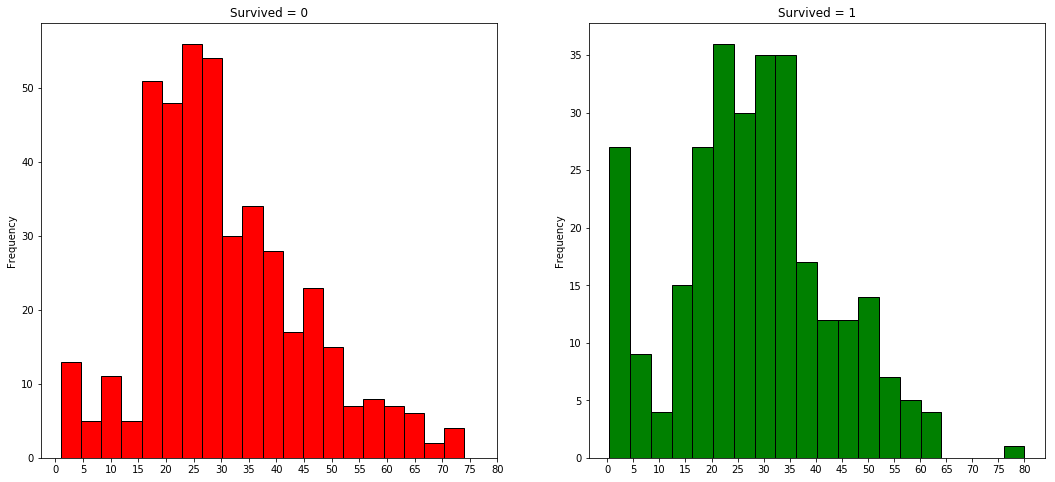

In [114]:
f,ax = plt.subplots(1,2,figsize = (18,8))
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data.Survived ==1].Age.plot.hist(ax = ax[1],color='green',edgecolor='black',bins=20)
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

# Second Way

In [115]:
"""data=pd.read_csv('train.csv')"""


"data=pd.read_csv('train.csv')"

In [116]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [117]:
pd.crosstab(data.Initial,data.Sex).style.background_gradient(cmap='summer_r')

Sex,female,male
Initial,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [118]:
print(data.groupby('Initial')['Age'].mean())
print(data.groupby('Initial')['Age'].std())

Initial
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64
Initial
Capt              NaN
Col          5.477226
Countess          NaN
Don               NaN
Dona              NaN
Dr          11.731115
Jonkheer          NaN
Lady              NaN
Major        4.949747
Master       4.161554
Miss        12.249077
Mlle         0.000000
Mme               NaN
Mr          12.422089
Mrs         12.901767
Ms                NaN
Rev         12.020815
Sir               NaN
Name: Age, dtype: float64


In [119]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Dr','royal','Mrs','Mrs','Mrs','royal','royal','royal','Mr','Mr','Mrs'],inplace=True)


In [120]:
data['Surname']=0
for i in data:
    data['Surname']=data.Name.str.extract("\(([^)]+)\)")

In [121]:
pd.crosstab(data.Surname,data.Sex).style.background_gradient(cmap='summer_r')

Sex,female,male
Surname,,
"""George Arthur Brayton""",0,1
"""Henry""",0,1
"""Irving""",0,1
"""Louis M Hoffman""",0,1
"""Mary""",1,0
"""Mr C Rolmane""",0,1
"""Mr E Haven""",0,1
"""Mr Henry Marshall""",0,1
"""Mr Morgan""",0,1


In [122]:
data['Surname'] = data['Surname'].fillna(0)
data.loc[(data['Surname']  != 0  ),'Surname']= 1

In [123]:
pd.crosstab(data.Initial,data.Surname,margins = True)

Surname,0,1,All
Initial,,,
Dr,7,1,8
Master,60,1,61
Miss,260,5,265
Mr,740,19,759
Mrs,6,195,201
royal,15,0,15
All,1088,221,1309


In [124]:
pd.crosstab(data.Initial,data.Survived).style.background_gradient(cmap='summer_r')

Survived,0.0,1.0
Initial,,
Dr,4,3
Master,17,23
Miss,55,131
Mr,437,82
Mrs,27,101
royal,9,2


In [125]:

Ini = ['Master','Miss','Mr','Mrs','Dr','royal']
def seperate(x):
    i = data.loc[(data.Initial == str(x))]
    age_max = i['Age'].max()
    age_min = i['Age'].min()
    age_std = i['Age'].std()
    age_avg = i['Age'].mean()

    age_null_count = i['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    for number in age_null_random_list:
        data.loc[(data.Age.isnull())&(data.Initial ==x),'Age']=number
     
    return data
for i in Ini:
    seperate(i)


In [126]:
data.Age.isnull().any()


False

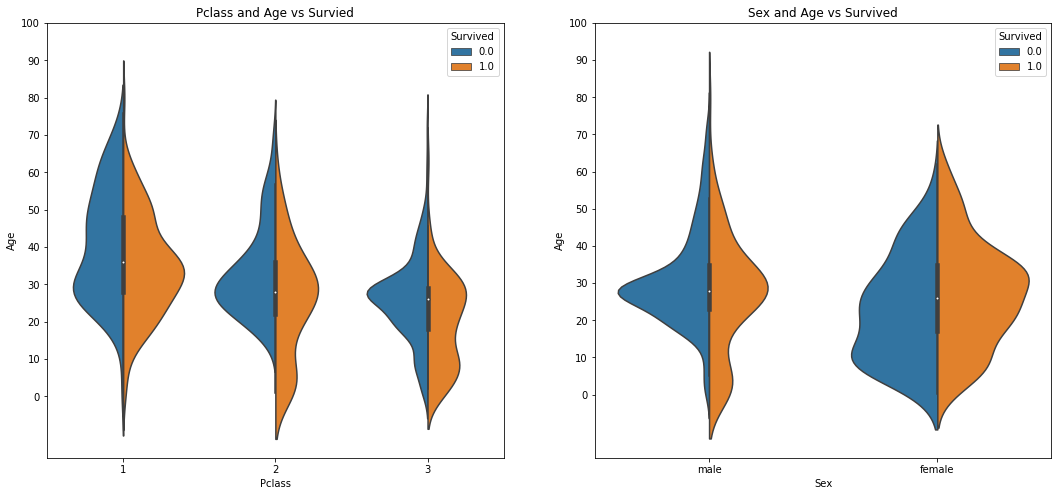

In [127]:
f,ax =plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue = "Survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survied')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

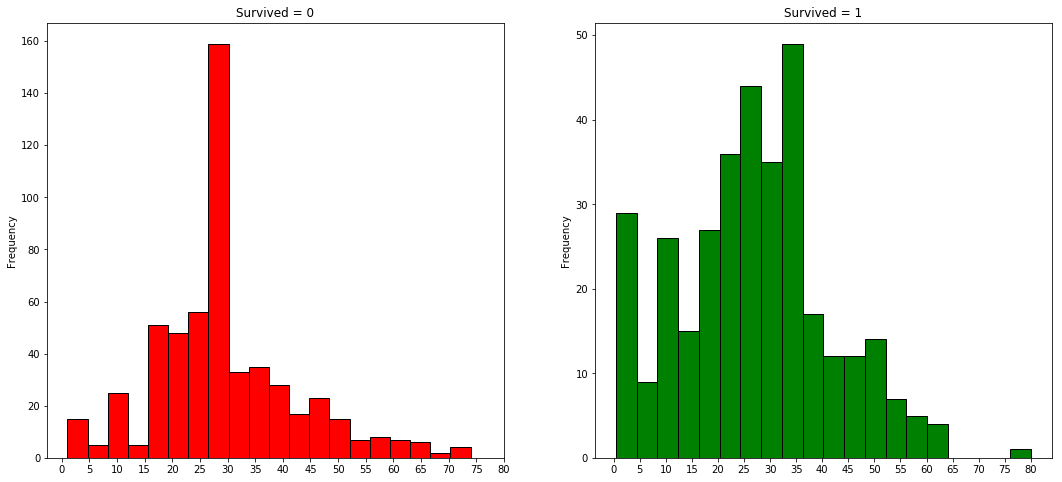

In [128]:
f,ax = plt.subplots(1,2,figsize = (18,8))
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data.Survived ==1].Age.plot.hist(ax = ax[1],color='green',edgecolor='black',bins=20)
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

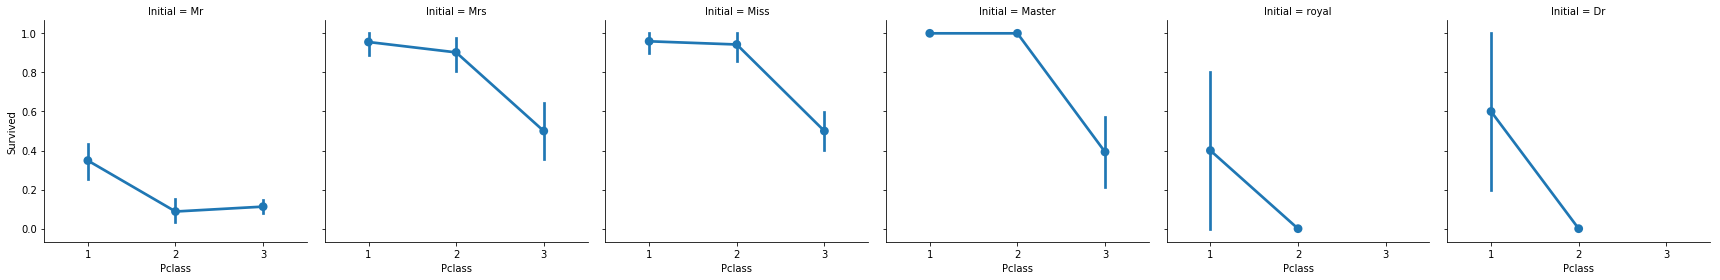

In [129]:
sns.factorplot('Pclass','Survived', col = 'Initial',data=data)
plt.show()

# Embarked-->Categorical Value

In [130]:
pd.crosstab([data['Embarked'],data['Pclass']],[data['Sex'],data['Survived']],margins=True).style.background_gradient(cmap='summer_r')

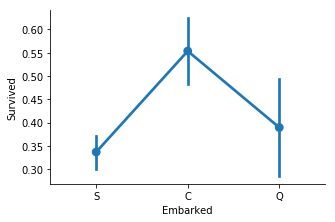

In [131]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

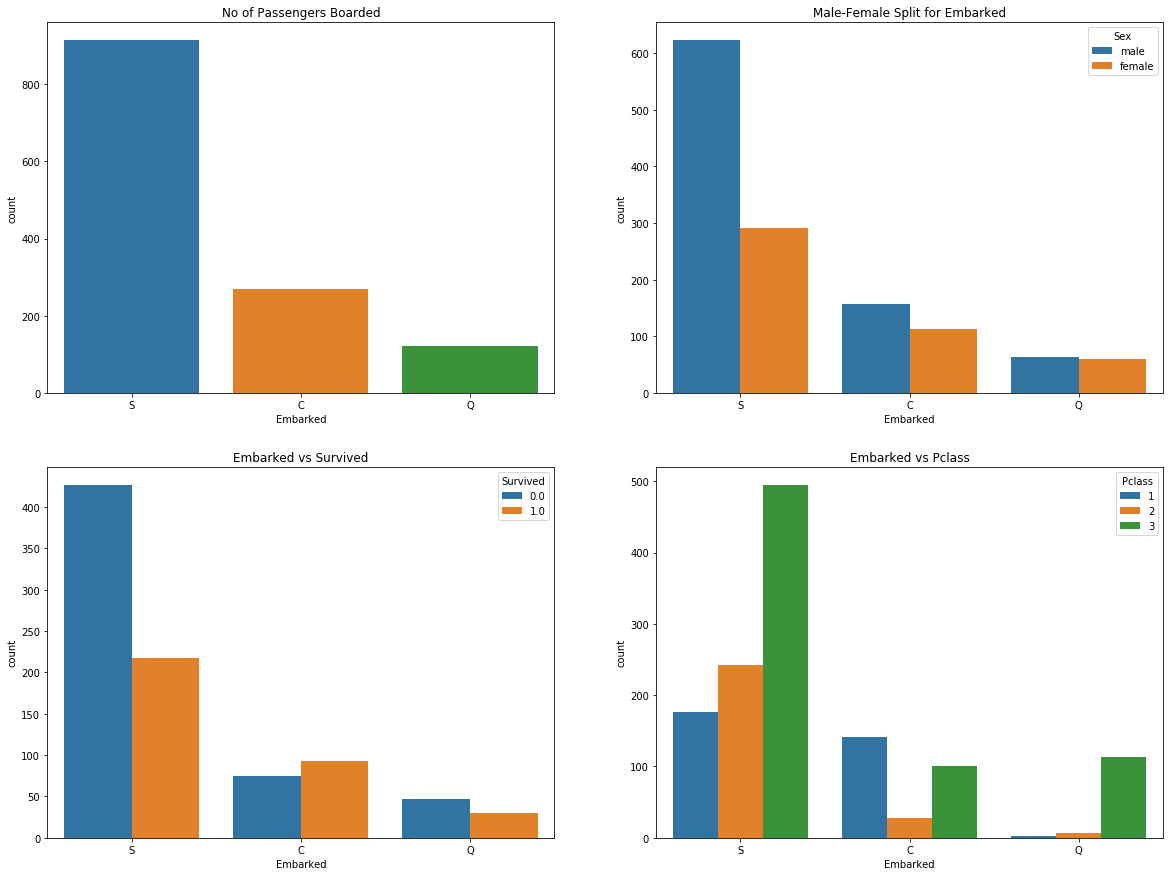

In [132]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue = 'Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.show()

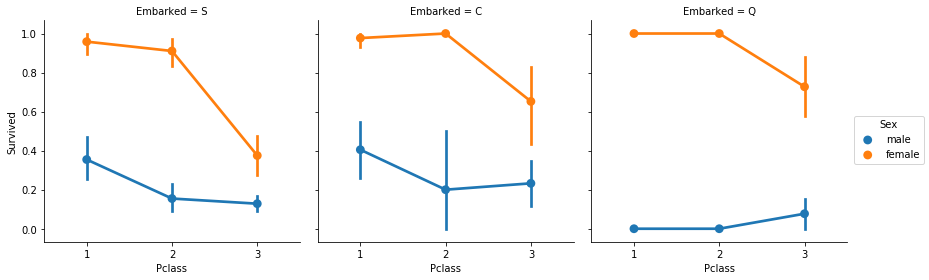

In [133]:
sns.factorplot('Pclass','Survived',hue = 'Sex',col='Embarked',data=data)
plt.show()

In [134]:
data['Embarked'].fillna('S', inplace =True)

In [135]:
data.Embarked.isnull().any()

False

# FamilySize and Alone

In [136]:
data['Alone'] = 0
data['FamilySize'] = data['Parch']+ data['SibSp']+1
data.loc[(data['FamilySize']==1),'Alone'] = 1

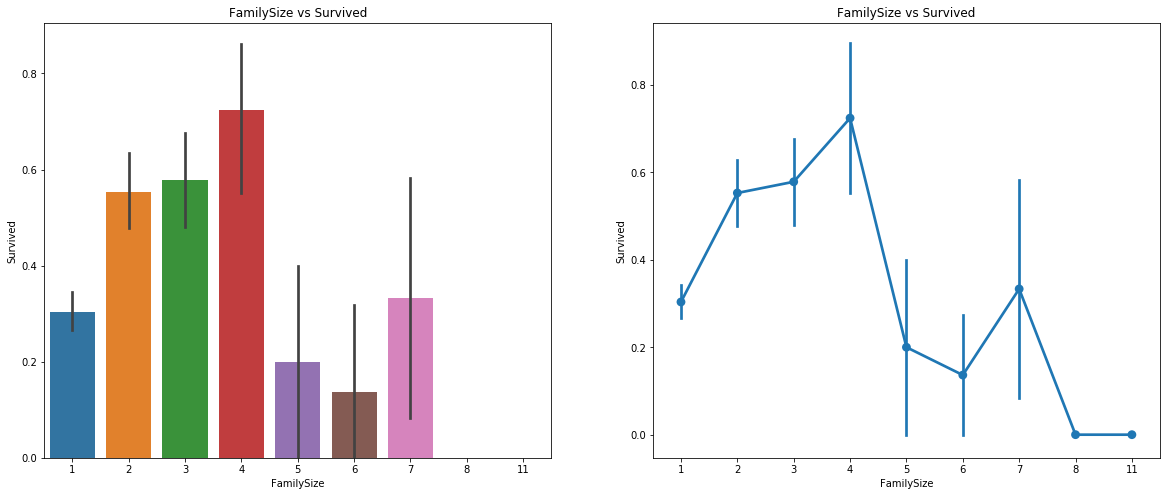

In [137]:

f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(data.FamilySize,data.Survived, data=data,ax = ax[0])
ax[0].set_title('FamilySize vs Survived')
sns.factorplot('FamilySize','Survived',data = data,ax=ax[1])
ax[1].set_title('FamilySize vs Survived')
plt.close(2)
plt.show()


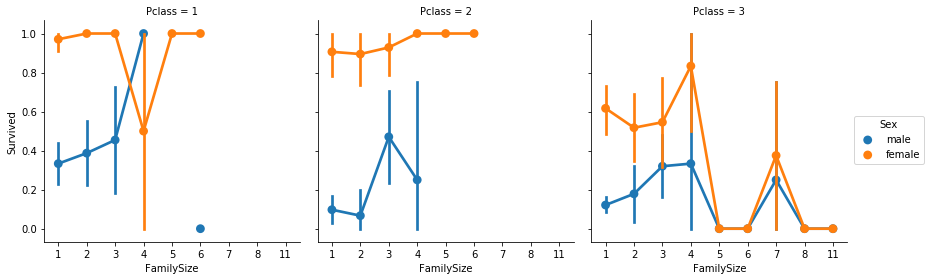

In [138]:
sns.factorplot('FamilySize','Survived',data = data,hue = 'Sex',col = 'Pclass')
plt.show()


In [139]:
data['Peers'] =  data.groupby('Ticket')['Ticket'].transform('size')

In [140]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Cabin_type,Initial,Surname,Alone,FamilySize,Peers
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,Mr,0,0,2,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,3,Mrs,1,0,2,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,0,1,1,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,3,Mrs,1,0,2,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,0,1,1,1


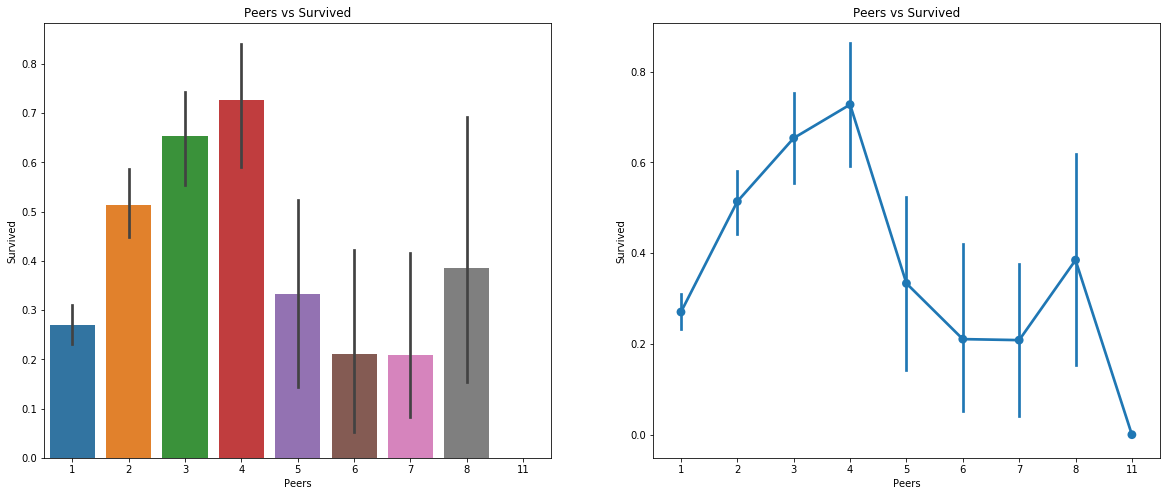

In [141]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(data.Peers,data.Survived, data=data,ax = ax[0])
ax[0].set_title('Peers vs Survived')
sns.factorplot('Peers','Survived',data = data,ax=ax[1])
ax[1].set_title('Peers vs Survived')
plt.close(2)
plt.show()

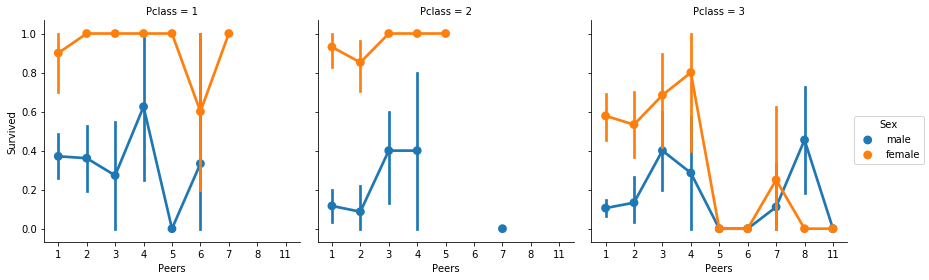

In [142]:
sns.factorplot('Peers','Survived',data = data,hue = 'Sex',col = 'Pclass')
plt.show()

In [143]:
data['max'] = 0
data['max'] =  data.groupby('Ticket')[['FamilySize','Peers']].transform('max')
data.head()
data.loc[(data['Peers']==7)].head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Cabin_type,Initial,Surname,Alone,FamilySize,Peers,max
13,39.0,NaN,S,31.2750,"Andersson, Mr. Anders Johan",5,14,3,male,1,0.0,347082,0,Mr,0,0,7,7,7
25,38.0,NaN,S,31.3875,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",5,26,3,female,1,1.0,347077,0,Mrs,1,0,7,7,7
50,7.0,NaN,S,39.6875,"Panula, Master. Juha Niilo",1,51,3,male,4,0.0,3101295,0,Master,0,0,6,7,6
72,21.0,NaN,S,73.5000,"Hood, Mr. Ambrose Jr",0,73,2,male,0,0.0,S.O.C. 14879,0,Mr,0,1,1,7,3
119,2.0,NaN,S,31.2750,"Andersson, Miss. Ellis Anna Maria",2,120,3,female,4,0.0,347082,0,Miss,0,0,7,7,7


In [144]:
data['Group']=data['FamilySize']/data['max']

In [145]:
data['Fare'].fillna(data['Fare'].median(), inplace = True)

In [146]:
data["per_fare"] = data["Fare"]/ (data["max"])

In [147]:
data['Fare'].isnull().any()

False

In [148]:
data['Fare'].fillna(data['Fare'].median(), inplace = True)
data['FareBin'] = pd.qcut(data['Fare'], 5)

label = LabelEncoder()
data['FareBin_Code'] = label.fit_transform(data['FareBin'])


In [149]:
data.loc[(data['Group'] < 1),'Group'] = 0

In [150]:
pd.crosstab([data['Group'],data['Sex']],data['Survived'],margins = True).style.background_gradient(cmap = 'summer_r')

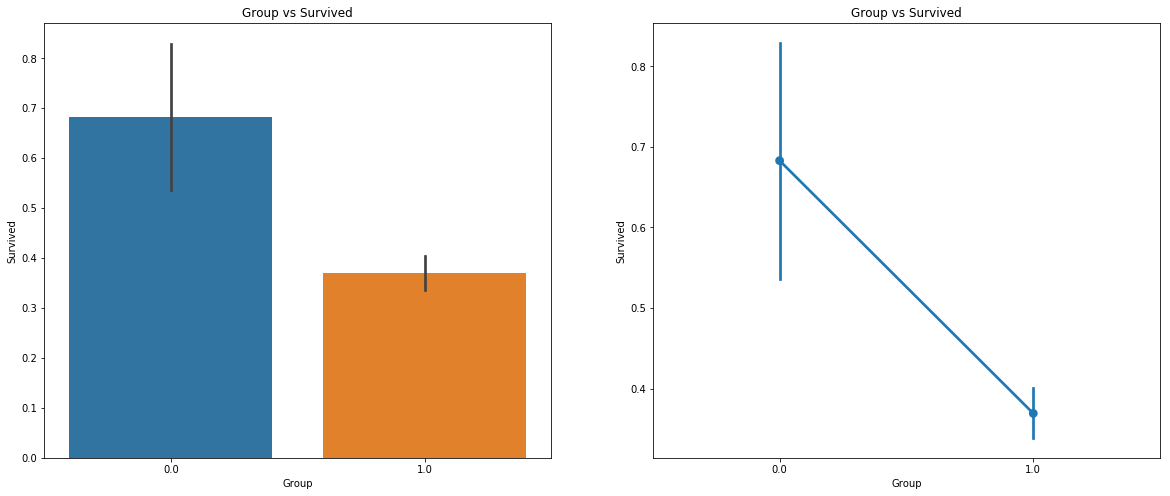

In [151]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(data.Group,data.Survived, data=data,ax = ax[0])
ax[0].set_title('Group vs Survived')
sns.factorplot('Group','Survived',data = data,ax=ax[1])
ax[1].set_title('Group vs Survived')
plt.close(2)
plt.show()

In [152]:
data['Sex'].replace(['male','female'],[1,0],inplace = True)
lab_enc = preprocessing.LabelEncoder()
data['Initial'] =  lab_enc.fit_transform(data['Initial'])

In [153]:
data.isnull().sum()

Age                0
Cabin           1014
Embarked           0
Fare               0
Name               0
Parch              0
PassengerId        0
Pclass             0
Sex                0
SibSp              0
Survived         418
Ticket             0
Cabin_type         0
Initial            0
Surname            0
Alone              0
FamilySize         0
Peers              0
max                0
Group              0
per_fare           0
FareBin            0
FareBin_Code       0
dtype: int64

In [154]:
data['Age']= data['Age'].fillna(0)

data.isnull().any()

Age             False
Cabin            True
Embarked        False
Fare            False
Name            False
Parch           False
PassengerId     False
Pclass          False
Sex             False
SibSp           False
Survived         True
Ticket          False
Cabin_type      False
Initial         False
Surname         False
Alone           False
FamilySize      False
Peers           False
max             False
Group           False
per_fare        False
FareBin         False
FareBin_Code    False
dtype: bool

In [155]:
data['Age_type'] = 0
data.loc[(data.Age == 0),'Age_type'] = 0
data.loc[(data.Age >0) & (data.Age < 8),'Age_type'] = 1
data.loc[(data.Age >=8) & (data.Age < 20),'Age_type'] = 2
data.loc[(data.Age >=20) & (data.Age < 50),'Age_type'] = 3
data.loc[(data.Age >=50 ),'Age_type'] = 4
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Surname,Alone,FamilySize,Peers,max,Group,per_fare,FareBin,FareBin_Code,Age_type
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0,0,2,1,2,1.0,3.62500,"(-0.001, 7.854]",0,3
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,1,0,2,2,2,1.0,35.64165,"(41.579, 512.329]",4,3
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,0,1,1,1,1,1.0,7.92500,"(7.854, 10.5]",1,3
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,1,0,2,2,2,1.0,26.55000,"(41.579, 512.329]",4,3
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,0,1,1,1,1,1.0,8.05000,"(7.854, 10.5]",1,3


In [156]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Surname,Alone,FamilySize,Peers,max,Group,per_fare,FareBin,FareBin_Code,Age_type
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0,0,2,1,2,1.0,3.62500,"(-0.001, 7.854]",0,3
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,1,0,2,2,2,1.0,35.64165,"(41.579, 512.329]",4,3
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,0,1,1,1,1,1.0,7.92500,"(7.854, 10.5]",1,3
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,1,0,2,2,2,1.0,26.55000,"(41.579, 512.329]",4,3
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,0,1,1,1,1,1.0,8.05000,"(7.854, 10.5]",1,3


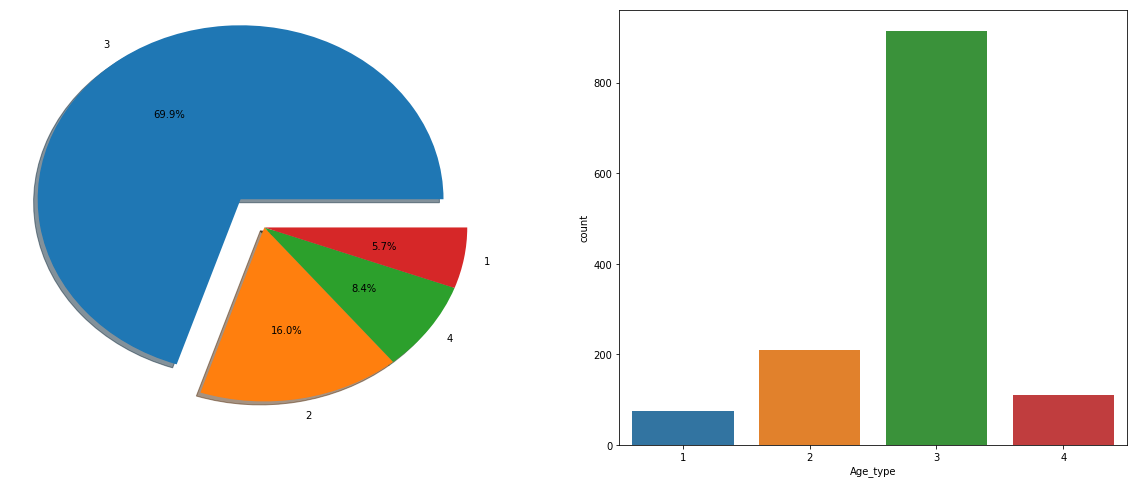

In [157]:
f,ax=plt.subplots(1,2,figsize=(20,8))
data['Age_type'].value_counts().plot.pie(explode = [0.2,0,0,0],autopct = '%1.1f%%',ax = ax[0],shadow = True)
ax[0].set_title = ('Age ratio')
ax[0].set_ylabel('')
sns.countplot('Age_type',data = data , ax= ax[1])
ax[1].set_title = ('Total Age_type')
plt.show()

In [158]:
print(data[["Age_type","Survived"]].groupby("Age_type").mean())
print(data[["Age_type","Survived"]].groupby("Age_type").std())

          Survived
Age_type          
1         0.666667
2         0.446667
3         0.345840
4         0.364865
          Survived
Age_type          
1         0.475831
2         0.498813
3         0.476030
4         0.484678


In [159]:
data["Name_length"] =  data["Name"].apply(len)

In [160]:
pd.crosstab(data.Initial,data.Surname,margins = True)

Surname,0,1,All
Initial,,,
0,7,1,8
1,60,1,61
2,260,5,265
3,740,19,759
4,6,195,201
5,15,0,15
All,1088,221,1309


In [161]:
train_index = data_train.shape[0]

In [162]:
data['Last_name'] = data['Name'].apply(lambda x: str.split(x,",")[0])

In [163]:
train_size = len(data_train)
fare_df = data.loc[data['FamilySize']>1, ["Last_name", "Fare", "FamilySize"]].iloc[:train_size]
fare_diff = (((fare_df.groupby(['Last_name', 'FamilySize']).max() 
 - fare_df.groupby(['Last_name', 'FamilySize']).min())!=0).sum()/train_size * 100)

print(("Percentage of families with different fares is: %.1f" %(fare_diff.values)) + '%')

Percentage of families with different fares is: 1.7%


In [164]:
fare_diff = (((fare_df.groupby(['Last_name', 'FamilySize']).max() 
 - fare_df.groupby(['Last_name', 'FamilySize']).min())!=0))
fare_diff.head()

,,Fare
Last_name,FamilySize,
Abbott,3,False
Abelson,2,False
Ahlin,2,False
Aks,2,False
Allison,4,False


In [165]:
train_temp_df = data.iloc[:train_size]
family_df_grpby = train_temp_df[train_temp_df['FamilySize']>1][
    ['Last_name', 'Fare', 'FamilySize', 'Survived']].groupby(['Last_name','Fare'])


In [166]:
family_df = pd.DataFrame(data=family_df_grpby.size(), columns=['Size in train'])
family_df['Survived total'] = family_df_grpby['Survived'].sum().astype(int)
family_df['FamilySize'] = family_df_grpby['FamilySize'].mean().astype(int)

In [167]:
family_df.head()

,,Size in train,Survived total,FamilySize
Last_name,Fare,,,
Abbott,20.250,2,1,3
Abelson,24.000,2,1,2
Ahlin,9.475,1,0,2
Aks,9.350,1,1,2
Allison,151.550,3,1,4


In [168]:
#family_df = family_df[family_df['FamilySize']==8]
print("Whole family survived: %.1f" 
      %(100*len(family_df[family_df['Size in train']==family_df['Survived total'] ])/len(family_df))+'%') 
print("Whole family perished: %.1f" 
      %(100*len(family_df[family_df['Survived total'] == 0])/len(family_df))+'%') 

Whole family survived: 44.7%
Whole family perished: 35.7%


In [169]:

data['Fare'].fillna(data['Fare'].mean(),inplace = True)

DEFAULT_SURVIVAL_VALUE = 0.5
data['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in data[['Survived','Name', 'Last_name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_name', 'Fare']):
    
   
    if(len(grp_df) != 1):
        #A Family group is found
        for ind,row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin == 0.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0 
                
print("Number of passengers with family survival information:",
     data.loc[data["Family_Survival"] !=0.5].shape[0])

Number of passengers with family survival information: 420


In [170]:
data.loc[data['Family_Survival'] ==1]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Peers,max,Group,per_fare,FareBin,FareBin_Code,Age_type,Name_length,Last_name,Family_Survival
8,27.00,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,0,...,3,3,1.0,3.711100,"(10.5, 21.558]",2,3,49,Johnson,1.0
10,4.00,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,11,3,0,1,...,3,3,1.0,5.566667,"(10.5, 21.558]",2,1,31,Sandstrom,1.0
25,38.00,NaN,S,31.3875,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",5,26,3,0,1,...,7,7,1.0,4.483929,"(21.558, 41.579]",3,3,57,Asplund,1.0
27,19.00,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,1,3,...,6,6,1.0,43.833333,"(41.579, 512.329]",4,2,30,Fortune,1.0
34,28.00,NaN,C,82.1708,"Meyer, Mr. Edgar Joseph",0,35,1,1,1,...,2,2,1.0,41.085400,"(41.579, 512.329]",4,3,23,Meyer,1.0
35,42.00,NaN,S,52.0000,"Holverson, Mr. Alexander Oskar",0,36,1,1,1,...,2,2,1.0,26.000000,"(41.579, 512.329]",4,3,30,Holverson,1.0
39,14.00,NaN,C,11.2417,"Nicola-Yarred, Miss. Jamila",0,40,3,0,1,...,2,2,1.0,5.620850,"(10.5, 21.558]",2,2,27,Nicola-Yarred,1.0
43,3.00,NaN,C,41.5792,"Laroche, Miss. Simonne Marie Anne Andree",2,44,2,0,1,...,4,4,1.0,10.394800,"(21.558, 41.579]",3,1,40,Laroche,1.0
52,49.00,D33,C,76.7292,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,53,1,0,1,...,3,2,1.0,38.364600,"(41.579, 512.329]",4,3,40,Harper,1.0
58,5.00,NaN,S,27.7500,"West, Miss. Constance Mirium",2,59,2,0,1,...,4,4,1.0,6.937500,"(21.558, 41.579]",3,1,28,West,1.0


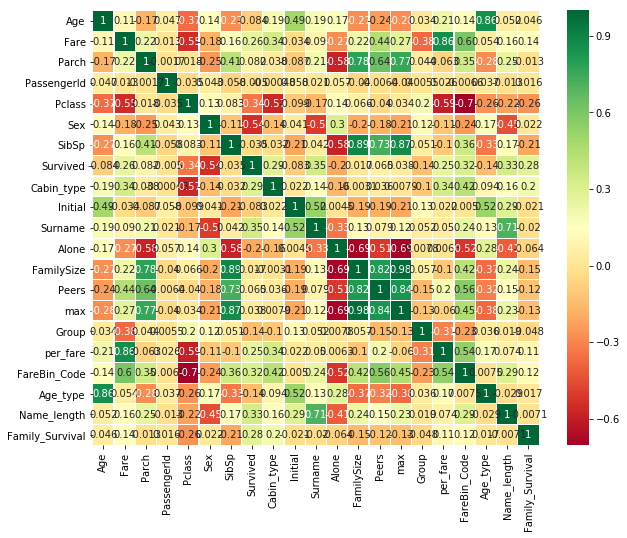

In [171]:
sns.heatmap(data.iloc[:int(data_train.shape[0])].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

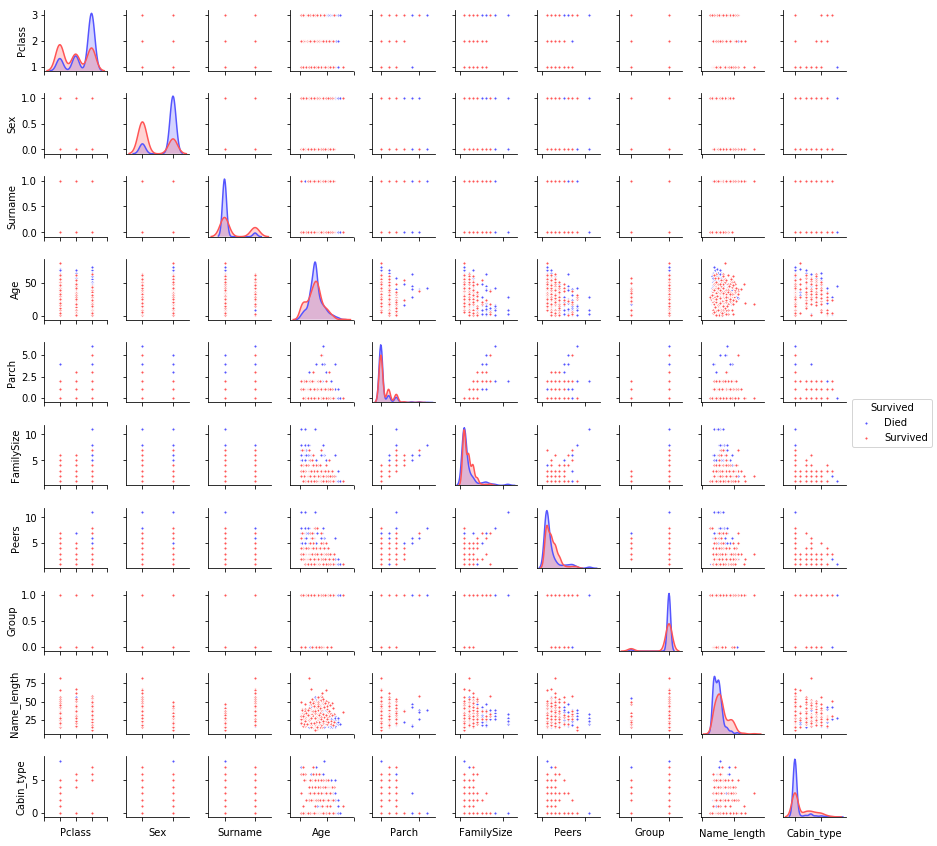

In [172]:
temp = data.iloc[:int(data_train.shape[0])].copy()
temp["Survived"][temp["Survived"]==1] = 'Survived'
temp["Survived"][temp["Survived"]==0] = 'Died'

g = sns.pairplot(temp[[u'Pclass',u'Sex',u'Surname',u'Age'  , u'Parch',  u'FamilySize',  u'Survived',u'Peers',u'Group',u'Name_length',u'Cabin_type']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])


In [173]:
temp = data.iloc[:int(data_train.shape[0])].copy()

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import clone
from sklearn import utils
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm

from sklearn import neighbors
from sklearn import gaussian_process
from sklearn import ensemble
from sklearn import naive_bayes 
from sklearn import discriminant_analysis
from sklearn import linear_model
from sklearn import tree
from sklearn.metrics import confusion_matrix
from brew.base import Ensemble, EnsembleClassifier
from brew.stacking.stacker import EnsembleStack, EnsembleStackClassifier
from brew.combination.combiner import Combiner

from xgboost import XGBRegressor
from xgboost import XGBClassifier
import math

In [175]:
"""
cal = ['Sex','Family_Survival','per_fare','FamilySize','Age_type','FareBin_Code']

data_n_age= temp.loc[(temp['Age'] == 0)]
data_age1=temp.loc[(temp['Age']>=1)]

data_age2 = data_age1.copy()
data_age = data_age1.append(data_n_age)


train_x_age,test_x_age =model_selection.train_test_split(data_age2[cal],random_state = 42)




def sqrt(x):
     return math.sqrt(x)

    
  
train_x_age,test_x_age =model_selection.train_test_split(data_age1[cal],random_state = 42)
#data_age1['Age'] = data_age1['Age'].apply(sqrt)
data_age1['Age'] = data_age1['Age'].astype(int)
print(utils.multiclass.type_of_target(data_age1['Age']))
print(utils.multiclass.type_of_target(data_age1['Age'].astype('int')))

print("Data Shape: {}".format(temp.shape))
print( "No Data Shape: {}".format(data_n_age[cal].shape)) 
print( "Shape: {}".format(data_age1[cal].shape)) 
    
print("Train1 Shape: {}".format(train_x_age.shape))
print("Test1 Shape: {}".format(test_x_age.shape))
"""




'\ncal = [\'Sex\',\'Family_Survival\',\'per_fare\',\'FamilySize\',\'Age_type\',\'FareBin_Code\']\n\ndata_n_age= temp.loc[(temp[\'Age\'] == 0)]\ndata_age1=temp.loc[(temp[\'Age\']>=1)]\n\ndata_age2 = data_age1.copy()\ndata_age = data_age1.append(data_n_age)\n\n\ntrain_x_age,test_x_age =model_selection.train_test_split(data_age2[cal],random_state = 42)\n\n\n\n\ndef sqrt(x):\n     return math.sqrt(x)\n\n    \n  \ntrain_x_age,test_x_age =model_selection.train_test_split(data_age1[cal],random_state = 42)\n#data_age1[\'Age\'] = data_age1[\'Age\'].apply(sqrt)\ndata_age1[\'Age\'] = data_age1[\'Age\'].astype(int)\nprint(utils.multiclass.type_of_target(data_age1[\'Age\']))\nprint(utils.multiclass.type_of_target(data_age1[\'Age\'].astype(\'int\')))\n\nprint("Data Shape: {}".format(temp.shape))\nprint( "No Data Shape: {}".format(data_n_age[cal].shape)) \nprint( "Shape: {}".format(data_age1[cal].shape)) \n    \nprint("Train1 Shape: {}".format(train_x_age.shape))\nprint("Test1 Shape: {}".format(test_

In [176]:
#pd.crosstab(data_n_age['Pclass'],data_n_age['Survived'],margins = True)

In [177]:
#pd.crosstab([data_n_age['Pclass'],data_n_age['Initial']],data_n_age['Survived'],margins = True)

In [178]:
#data_n_age.loc[(temp["Initial"] == 2)].head()

In [179]:
#test_x_age.head()

In [180]:
#data_age1.head()

In [181]:
temp['per_fare'] = temp['per_fare'].astype(int)

In [182]:
cal = ['Sex','Family_Survival','FamilySize','Age_type','FareBin_Code','Pclass']
train,test=train_test_split(temp[cal],test_size=0.3,random_state=0,stratify=temp['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=temp[cal]
Y=temp['Survived']

In [183]:
temp['Survived'].head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [184]:
X.head(15)

,Sex,Family_Survival,FamilySize,Age_type,FareBin_Code,Pclass
0,1,0.5,2,3,0,3
1,0,0.5,2,3,4,1
2,0,0.5,1,3,1,3
3,0,0.0,2,3,4,1
4,1,0.5,1,3,1,3
5,1,0.5,1,3,1,3
6,1,0.5,1,4,4,1
7,1,0.0,5,1,2,3
8,0,1.0,3,3,2,3
9,0,0.0,2,2,3,2


In [101]:
MLR = [
    
    linear_model.LinearRegression(),

    linear_model.BayesianRidge(),
    
    #linear_model.SGDRegressor(),
    #Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.GradientBoostingRegressor(), 
    ensemble.RandomForestRegressor(),
    ensemble.ExtraTreesRegressor(),
    #Gaussian Processes
  
    
    #GLM
    


    
    
    #Navies Bayes
    
    
    #Nearest Neighbor
    neighbors.KNeighborsRegressor(),
    
    #SVM
    svm.SVR(),
    
    #Trees    
    tree.DecisionTreeRegressor(),
    #Discriminant Analysis
    

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBRegressor()    
    ]

In [102]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

In [103]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size =.3, train_size = .6 ,random_state = 42)
kf = model_selection.KFold(n_splits= 5, random_state = 42)
#create table to compare MLA metrics
MLA_columns = ['MLA Name','MLA Parameters','MLA Train Accuracy Mean',' MLA Test Accuracy Mean','MLA Test Accuracy 3* STD','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
Target = ['Survived']
#create table to compare MLA predictions
MLA_predict = temp[Target]

row_index = 0
 
for alg in MLA:
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, temp[cal],temp[Target], cv = 5)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    
    
    #Save MLA predictions - see section 6 for usage
    alg.fit(temp[cal],temp[Target])
    MLA_predict[MLA_name] = alg.predict(temp[cal])
    row_index+=1
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3* STD,MLA Time,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856903,NaN,NaN,0.0153833,0.839512,0.034370
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.845117,NaN,NaN,0.0429144,0.838389,0.040206
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.868129,NaN,NaN,0.0540327,0.832827,0.056275
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.832494,NaN,NaN,0.0253737,0.832815,0.045572
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.88328,NaN,NaN,0.0115605,0.829456,0.075306
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.827163,NaN,NaN,0.00171113,0.829450,0.045669
8,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.826883,NaN,NaN,0.00372772,0.828327,0.041828
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.836422,NaN,NaN,0.0540934,0.828314,0.054222
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.831647,NaN,NaN,0.0544616,0.828308,0.038237
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.882441,NaN,NaN,0.011454,0.824962,0.060157


In [104]:

from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
xyz=[]
accuracy=[]
std=[]

classifiers=['Ada','Bagging','Extra','Gradiet','Random','Gaussian','LogisticRCV','PassiveAgg','Ridge','SGD','Perceptron','Bernoulli',
             'GaussianNB','KNeighbor','SVC','NuSVC','LinearSVC','Decision','Extra','LinearDiscriminant','Quadratic','XGB']
for i in MLA:
    model = i
    cv_result = model_selection.cross_val_score(model,X,Y, cv = kf,scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Ada,0.823796,0.017589
Bagging,0.824933,0.029058
Extra,0.819308,0.017860
Gradiet,0.832779,0.021082
Random,0.822679,0.022005
Gaussian,0.820438,0.020911
LogisticRCV,0.827180,0.019721
PassiveAgg,0.704771,0.135053
Ridge,0.830544,0.020687
SGD,0.662055,0.149983


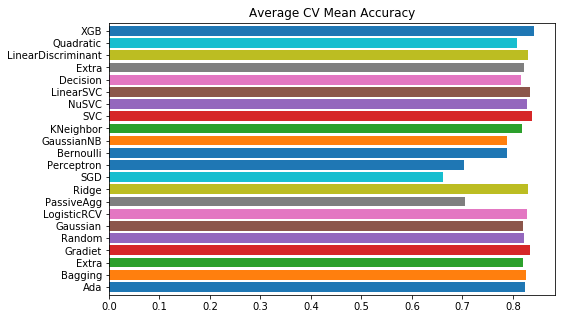

In [105]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

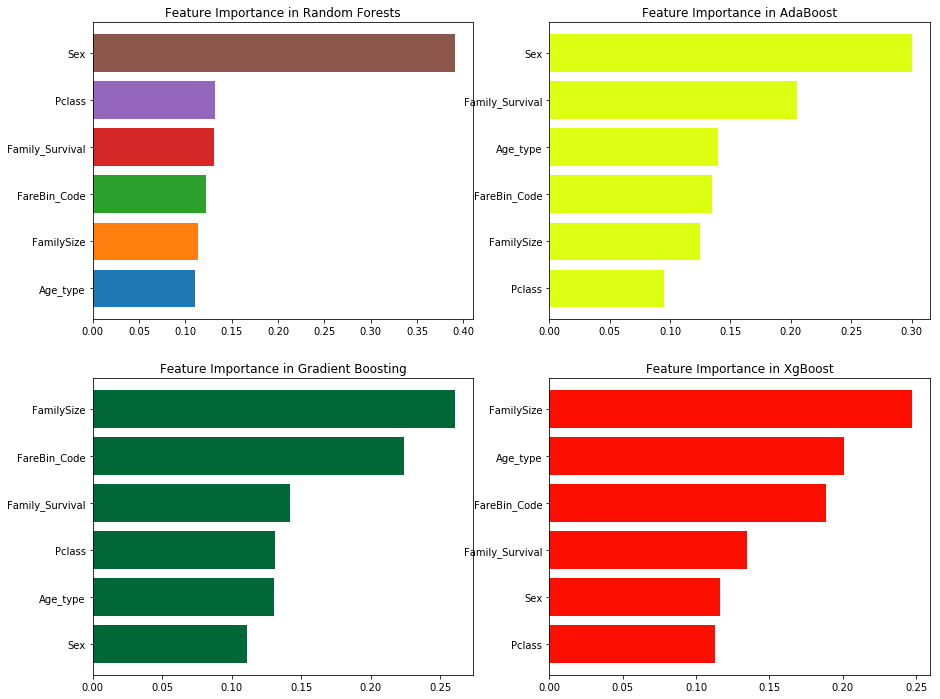

In [106]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=ensemble.RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=ensemble.AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=ensemble.GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

In [107]:
train_index = temp.shape[0]
real_test = data.iloc[int(train_index):]

real_test_X = real_test[cal]
real_test_Y = real_test['Survived']
#real_test_X['per_fare'] = real_test_X['per_fare'].fillna(0)
#real_test_X['per_fare'] = real_test_X['per_fare'].astype(int)
real_test_X.isnull().any()

Sex                False
Family_Survival    False
FamilySize         False
Age_type           False
FareBin_Code       False
Pclass             False
dtype: bool

In [130]:
n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}
gd=GridSearchCV(estimator = neighbors.KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc",n_jobs =-1)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed:    4.0s


0.8742196920714118
KNeighborsClassifier(algorithm='auto', leaf_size=6, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')


[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    6.6s finished


In [129]:

param_grid = { 
    'n_estimators': range(100,1000,100) ,'learning_rate' : [0.1,0.2,0.5,1,1.5,2],
     'max_depth': [3,4,5,6,None] }
grid_search =GridSearchCV(ensemble.GradientBoostingClassifier(),param_grid,cv = 10,n_jobs = -1)
grid_search.fit(X,Y)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.8372615039281706
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [123]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              'n_estimators': range(100,1000,100) ,'learning_rate' : [0.1,0.2,0.5,1,1.5,2]
             }


DTC = tree.DecisionTreeClassifier(random_state = 42, max_features = "auto", class_weight = None,max_depth = None)
grid_search =GridSearchCV(ensemble.AdaBoostClassifier(base_estimator = DTC),param_grid = param_grid,cv = kf,n_jobs = 10)
grid_search.fit(X,Y)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=10,
       param_grid={'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__splitter': ['best', 'random'], 'n_estimators': range(100, 1000, 100), 'learning_rate': [0.1, 0.2, 0.5, 1, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [128]:
ada=ensemble.AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.0, n_estimators=50, random_state=42)
          
fit_ada = ada.fit(X,Y)
predi_ada = ada.predict(real_test_X)
result=cross_val_score(ada,X,Y,cv=kf,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())
predi_ada = predi_ada.astype(int)

The cross validated score for AdaBoost is: 0.8237963718536188


In [ ]:
xgb =XGBClassifier()
fit_xgb = xgb.fit(X,Y)
predi_xgb = xgb.predict(real_test_X)
result = cross_val_score(xgb,X,Y,cv=5,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())
predi_xgb = predi_xgb.astype(int)

In [111]:
grad = ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
result = cross_val_score(grad,X,Y,cv = kf,scoring = "accuracy")
print('The cross validated score for Gradient:',result.mean())

The cross validated score for Gradient: 0.8327788588286988


In [ ]:
qudra = discriminant_analysis.QuadraticDiscriminantAnalysis()
result = cross_val_score(qudra,X,Y,cv = kf,scoring = "accuracy")
print('The cross validated score for qudra:',result.mean())

In [ ]:
dis = discriminant_analysis.LinearDiscriminantAnalysis()
result = cross_val_score(dis,X,Y,cv = kf,scoring = "accuracy")
print('The cross validated score for LinearDiscriminantAnalysis:',result.mean())

In [ ]:
extra = ensemble.ExtraTreesClassifier()
result = cross_val_score(extra,X,Y,cv = kf,scoring = "accuracy")
print('The cross validated score for Extratree:',result.mean())

In [ ]:

rid = linear_model.RidgeClassifierCV()
result =cross_val_score(rid,X,Y,cv = kf,scoring = 'accuracy')
print('The cross validated score for :',result.mean())

In [ ]:
rand = ensemble.RandomForestClassifier(n_jobs = -1,max_depth = 8, max_features='sqrt')
            
result = cross_val_score(rand,X,Y, cv = kf, scoring = 'accuracy')
print("The cross validated score for RandomForest:", result.mean())

In [ ]:
model = xgb.fit(X,Y)
y_test_pred  = model.predict(real_test_X)

In [136]:
grid_search.best_estimator_.fit(X, Y)
y_pred = grid_search.best_estimator_.predict(real_test_X)

In [139]:
y_pred = y_pred.astype(int)

In [143]:
emp = pd.DataFrame(pd.read_csv("input/test.csv")['PassengerId'])
emp['Survived'] =y_pred
emp.to_csv("original_submission.csv", index = False)
                            

In [ ]:
gaus = naive_bayes.GaussianNB()
result =cross_val_score(gaus,X,Y,cv = kf,scoring = 'accuracy')
print('The cross validated score for GaussianNB:',result.mean())

In [ ]:
logi = linear_model.LogisticRegressionCV()
result = cross_val_score(logi,X,Y,cv = kf,scoring = 'accuracy')
print("The cross validated score for logistic",result.mean())

In [ ]:
gausPC = gaussian_process.GaussianProcessClassifier()
result = cross_val_score(gausPC,X,Y,cv = kf,scoring = 'accuracy')
print('The cross validated score for GaussiaProcessClassifier:',result.mean())

In [ ]:
nusvc = svm.NuSVC(probability=True)
result = cross_val_score(nusvc,X,Y,cv = kf,scoring = 'accuracy')
print('The cross validated score for NuSVC:',result.mean())

In [ ]:
from vecstack import StackingTransformer
estimators = [('grad',grad) ,
              ('ada',ada),
             ('rand', rand),
             ('qudra',qudra)]
stack = StackingTransformer(estimators, regression=False, verbose=2)
stack = stack.fit(X, Y)

In [ ]:
S_train = stack.transform(X)
S_test = stack.transform(real_test_X)

In [ ]:
model = 
model = model.fit(S_train,Y)

y_test_pred = model.predict(S_test)
result =cross_val_score(xgb,S_train,Y,cv = kf,scoring = 'accuracy')
print('The cross validated score for XGB:',result.mean())

In [ ]:
y_test_pred = y_test_pred.astype(int)

In [140]:
StackingSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': y_pred  })
StackingSubmission.to_csv("StackingSubmission.csv", index=False)

NameError: name 'PassengerId' is not defined